In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas_profiling

In [2]:
df = pd.read_csv("glassdoor_jobs.csv")

In [3]:
df.head(100)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
96,96,Data Scientist,$64K-$107K (Glassdoor est.),Are you performance-driven and want your impac...,4.2,goTRG\n4.2,"Miami, FL","Miami, FL",501 to 1000 employees,2008,Company - Private,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),-1
97,97,Data Management Specialist,$31K-$65K (Glassdoor est.),"Location: Huntsville, AL\n\nClearance: Secret ...",4.5,NMR Consulting\n4.5,"Huntsville, AL","Chantilly, VA",51 to 200 employees,1996,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1
98,98,Machine Learning Engineer,-1,Kodiak Robotics is not just a software company...,4.9,Kodiak Robotics\n4.9,"Mountain View, CA","Mountain View, CA",51 to 200 employees,2018,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

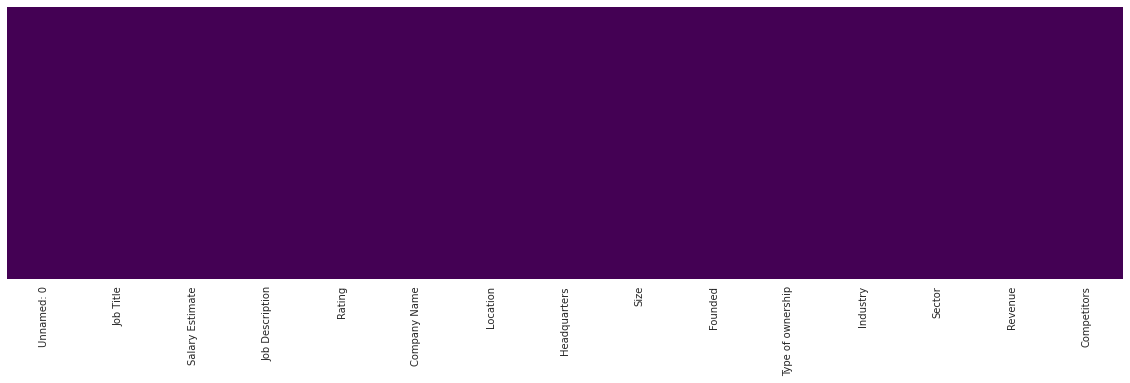

In [4]:
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [5]:
# pandas_profiling.ProfileReport(df)

In [6]:
df = df[df['Salary Estimate'] !='-1']

In [7]:
# removing the glassdoor text in salary estimate column
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [8]:
# removing dollar signs on salary
minus_kd = salary.apply(lambda x: x.replace('K','').replace('$',''))

In [9]:
# creating a new per hour column from salary estimated hourly or not
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0 )

In [10]:
# creating a new employer provided column from salary estimated
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0 )

In [11]:
df.head(80)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,R&D Sr Data Scientist,$99K-$157K (Glassdoor est.),We are seeking an experienced and innovative D...,4.0,HP Inc.\n4.0,"Vancouver, WA","Palo Alto, CA",10000+ employees,1939,Company - Public,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,0,0
84,84,Customer Data Scientist/Sales Engineer (Bay,$79K-$222K (Glassdoor est.),Company Overview\n\nH2O.ai is the open source ...,4.3,h2o.ai\n4.3,"Mountain View, CA","Mountain View, CA",201 to 500 employees,2011,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,0,0
85,85,Research Scientist,$57K-$118K (Glassdoor est.),Company Overview\n\nImagine if we could match ...,1.9,GNS Healthcare\n1.9,"Cambridge, MA","Cambridge, MA",51 to 200 employees,2000,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $25 million (USD),-1,0,0
86,86,Data Scientist,$83K-$137K (Glassdoor est.),Overview\n\n\nPeraton is seeking a Senior Data...,3.3,Peraton\n3.3,"Chantilly, VA","Herndon, VA",1001 to 5000 employees,2017,Company - Private,Aerospace & Defense,Aerospace & Defense,$1 to $2 billion (USD),-1,0,0


In [12]:
df['employer_provided'].unique()

array([0, 1])

In [13]:
min_her = minus_kd.apply(lambda x: x.lower().replace("per hour","").replace("employer provided salary:",""))

In [14]:
df['min_salary'] = min_her.apply(lambda x: int(x.split('-')[0]))

In [15]:
df['max_salary'] = min_her.apply(lambda x: int(x.split('-')[1]))

In [16]:
df['avg_salary'] = (df.min_salary + df.max_salary)/2

In [17]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5


In [18]:
# company name

In [19]:
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)

In [20]:
df['company_txt']

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
950                                      GSK\n
951                               Eventbrite\n
952           Software Engineering Institute\n
953                             Numeric, LLC\n
955             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

In [21]:
# getting state

In [22]:
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])

In [23]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [24]:
# same state

In [25]:
df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1)

In [26]:
# age of the company

In [27]:
df['age'] = df.Founded.apply(lambda x: x if x<1 else 2022 - x)

In [28]:
# checking for requriments for jobs
#python

In [29]:
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [30]:
df.python_yn.value_counts()

1    392
0    350
Name: python_yn, dtype: int64

In [31]:
# r studio

In [32]:
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

In [33]:
df.R_yn.value_counts()

0    740
1      2
Name: R_yn, dtype: int64

In [34]:
# spark

In [35]:
df['spark_yn'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

In [36]:
df.spark_yn.value_counts()

0    575
1    167
Name: spark_yn, dtype: int64

In [37]:
# aws

In [38]:
df['aws_yn'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

In [39]:
df.aws_yn.value_counts()

0    566
1    176
Name: aws_yn, dtype: int64

In [40]:
# excel

In [41]:
df['excel_yn'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [42]:
df.excel_yn.value_counts()

1    388
0    354
Name: excel_yn, dtype: int64

In [43]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [44]:
df_out = df.drop(['Unnamed: 0'], axis=1)

In [45]:
df_out.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,49,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,12,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,24,1,0,0,0,1


In [46]:
df_out.to_csv('salary_data_cleaned.csv', index=False)